In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
#import sys
#sys.path.append('../')
#import Clustering_helper_functions as helper

In [13]:
df = pd.read_pickle('PKL/nyc_full_pc.pkl')

In [14]:
df.shape

(1980, 108)

In [4]:
kmeans = KMeans(n_clusters = 4)

In [9]:
kmeans.fit(df.drop('TRACTID',axis = 1))

KMeans(n_clusters=4)

In [10]:
kmeans.cluster_centers_

array([[ 3.86213439e+03,  3.95700000e+03,  5.42647232e+01, ...,
         7.18080333e+01, -3.81023104e+01, -9.49569247e+00],
       [ 3.78272107e+03,  3.83747364e+03,  2.19814525e+01, ...,
         5.03846896e+01, -3.05465130e+01, -1.17840007e+00],
       [ 6.73333597e+03,  6.54700000e+03,  2.00505874e+00, ...,
         6.39285997e-01,  1.04576016e+00,  2.32613413e+01],
       [ 5.17422799e+03,  4.91700000e+03,  1.79746586e+00, ...,
        -5.18035412e+01, -3.99006859e+01,  3.49035669e+01]])

In [11]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

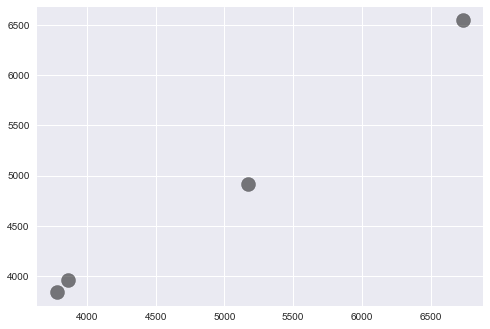

In [12]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Hierarchical Clustering

In [38]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, method = 'ward')

In [39]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


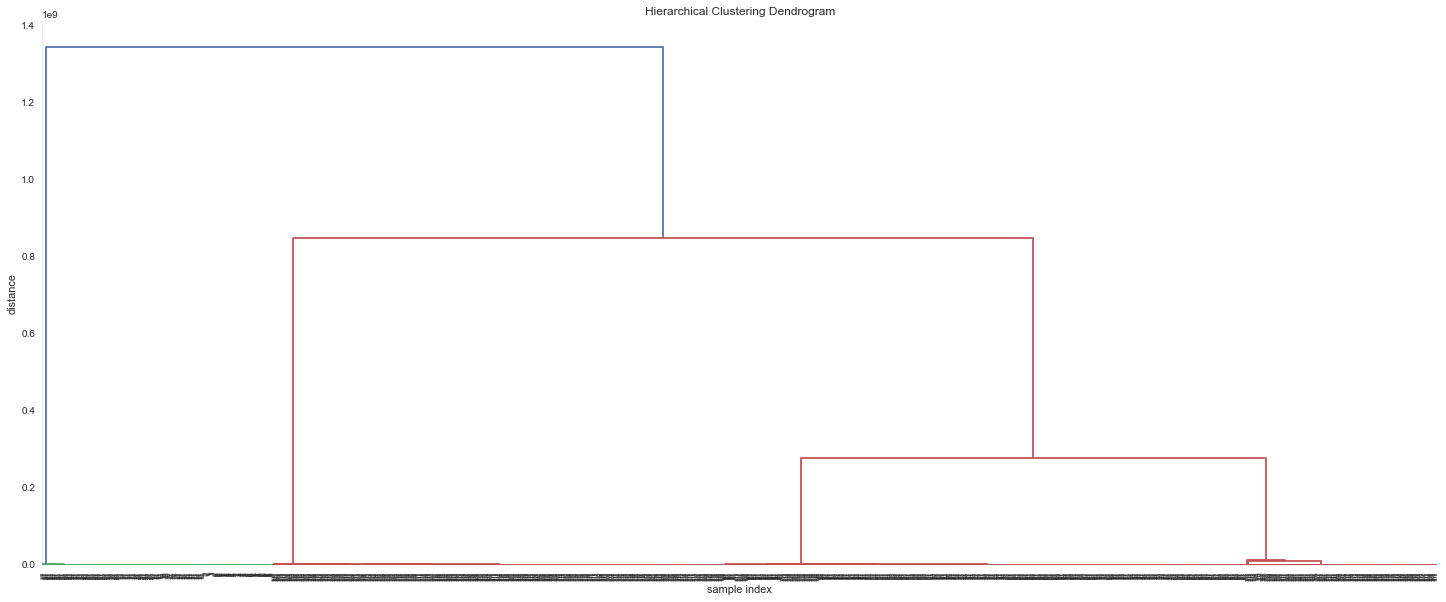

In [40]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=4.,  # font size for the x axis labels
)
plt.show()

## With scikit learn

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_iris, pred_iris_clust)

In [41]:
X = df.drop('TRACTID',axis = 1)

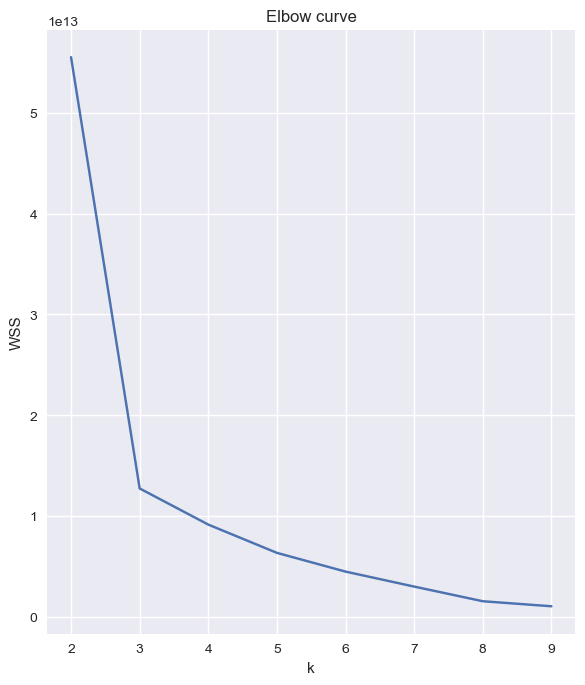

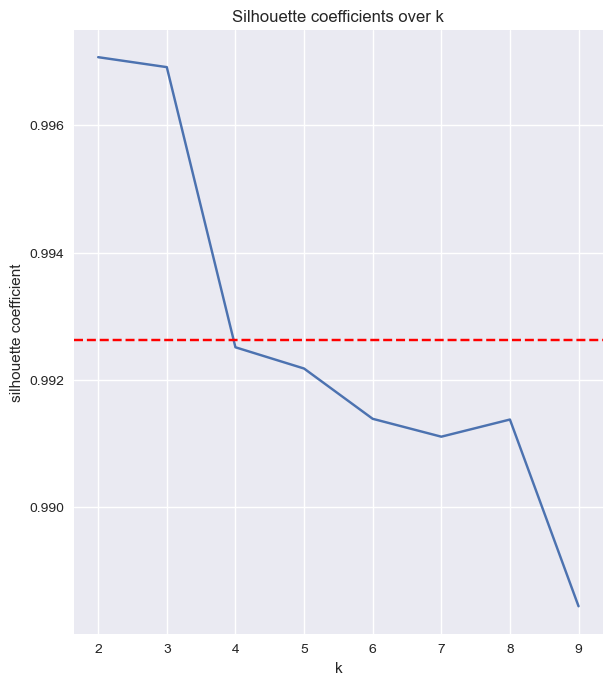

In [43]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

    # Plot values of SSE
plt.figure(figsize=(15,8),dpi=100)
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

    # check silhouette
silhouette_plot = []
    # Calculate silhouette coefficient for different K
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    # Plot Silhouette coefficient
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

## Plotting the Map data

In [18]:
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes

In [21]:
nyc = gpd.read_file('DATA/2010_Census_Tracts/geo_export_83f1c1ac-51a3-4fa2-b748-caf3aeb90965.shp')


Text(0.5, 115.0, 'Longitude')

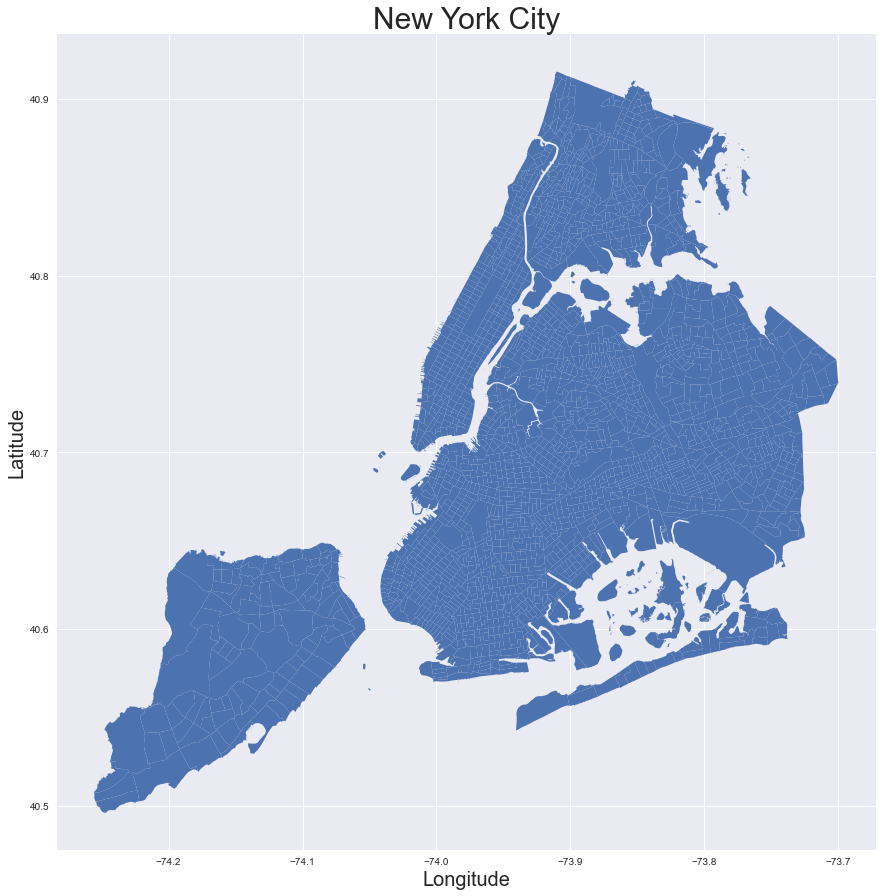

In [24]:
fig, ax = plt.subplots(figsize = (15,15))
nyc.plot(ax=ax)
ax.set_title('New York City',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})